In [1]:
!pip3 install git+https://github.com/bengisug/yzv_abet_src@main

  Cloning https://github.com/bengisug/yzv_abet_src (to revision main) to /private/var/folders/9l/7dn7hm996q90xx094fkln7380000gn/T/pip-req-build-tqt95ync
  Created wheel for yzv-abet: filename=yzv_abet-0.1-py3-none-any.whl size=5011 sha256=1b849511b95e29e2eb8d8708bfb0d5bc3195c44556b93c0a1aa6110c5657f530
  Stored in directory: /private/var/folders/9l/7dn7hm996q90xx094fkln7380000gn/T/pip-ephem-wheel-cache-8wqm3mwo/wheels/25/29/0c/85183a70743c741db0f76e14cbb1e5a4e904c9ecd280b546af
Successfully built yzv-abet


In [13]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from src.parsers.parser import *
# from src.widgets.my_widgets import *
import matplotlib.pyplot as plt
# from src.plots.my_plt import *
import seaborn as sns
from copy import deepcopy
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
df1, df2, df3, mand_df, elec_df = parse_courses()


course_types = {'All':df2.index, 'Mandatory':mand_df.index, 'Elective': elec_df.index}


def handle_choice(choice):
    if 'All' in choice:
        return df2.index
    elif 'Mandatory' in choice and 'Elective' in choice:
        return df2.index
    elif 'Mandatory' in choice:
        return mand_df.index
    elif 'Elective' in choice:
        return elec_df.index
    else:
        return list(choice)
        

course_widget = widgets.Dropdown(
    options=df2.index,
    value=df2.index[0],
    description='Course:',
    continuous_update=False,
    disabled=False,
)

pi_widget = widgets.SelectionSlider(
    options=['1', '2', '3', '4', '5', '6', '7'],
    value='1',
    description='PI Selection:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True
)

subpi_widget = widgets.Dropdown(
    options=list(df2.loc[:, "1":"7"].T.index.levels[1][2:]),
    value='PI.1.1',
    description='Sub-PI Selection:',
    disabled=False,
    continuous_update=True,
    readout=True
)

dist_widget = widgets.SelectMultiple(
    options=list(course_types.keys()) + list(df2.index),
    value=('All',),
    description='Courses:',
    disabled=False
)


ModuleNotFoundError: No module named 'google.colab'

In [18]:
colors = sns.color_palette('pastel')[0:50]


def pi_dist_pie(course):
    clear_output(wait=True)
    df = df2.loc[course]["1":"7"]
    df_print = pd.DataFrame(data=df.sum(level=0).values / df.sum(level=0).values.sum() * 100, index=df.sum(level=0).index, columns=['PI Percentage'])
    display(HTML(df_print.T.to_html()))
    plt.figure(figsize=(8, 6), dpi=80)
    plt.pie(df.sum(level=0).values, labels = df.sum(level=0).index, colors = colors[:7], autopct='%.0f%%')
    plt.legend(labels=df.sum(level=0).index)
    plt.title("PI Distribution Chart of Course")
    plt.show()


def pi_levels_percourse(course):
    clear_output(wait=True)
    df = df2.loc[course]["1":"7"]
    fig, axs = plt.subplots(1, 7, figsize=(28,4))
    for i in range(1, 8):
        sns.barplot(x=df[str(i)].index, y=df[str(i)].values, palette = colors[:len(df[str(i)].index)], ax=axs[i-1])
        axs[i-1].set_xlabel("PI: {}".format(i))
        axs[i-1].set_ylabel("Contribution Level")


def total_course_pi(choice):
    clear_output(wait=True)
    idx = handle_choice(choice)
    df = df2.loc[idx].T.loc["1":"7"].T
    df_print = pd.DataFrame(data=df.sum(axis=1), index=df.index, columns=['Sum of Contributions'])
    display(HTML(df_print.T.to_html()))
    plt.figure(figsize=(len(idx), 5), dpi=80)
    ax = sns.pointplot(x=df.index, y=df.sum(axis=1), palette=colors[:len(df)])
    plt.show()
    return


def pi_contr_level_dist(choice):
    clear_output(wait=True)
    idx = handle_choice(choice)
    df = df2.loc[idx].T.loc["1":"7"]
    df_save = deepcopy(df)
    df['pis'] = df.index.levels[1][2:]
    deneme = pd.melt(df, id_vars=['pis'], value_vars=list(df.columns).remove('pis'))
    plt.figure(figsize=(12, 8), dpi=80)
    ax1 = sns.boxplot(x='pis', y='value', data=deneme, palette=colors[:len(deneme['pis'])])
    ax1.set_xlabel("Sub-PI")
    ax1.set_ylabel("Contribution Level")
    plt.title("Sub-PI Contribution Level Distribution of Courses")
    plt.show()
    
    df_save = df_save.groupby(level=0).sum() / df_save.groupby(level=0).count()
    df = deepcopy(df_save)
    df['pis'] = df.index
    deneme = pd.melt(df, id_vars=['pis'], value_vars=list(df.columns).remove('pis'))
    plt.figure(figsize=(12, 8), dpi=80)
    ax2 = sns.boxplot(x='pis', y='value', data=deneme, palette=colors[:len(deneme['pis'])])
    ax2.set_xlabel("PI")
    ax2.set_ylabel("Contribution Level")
    plt.title("PI Contribution Level Distribution of Courses")
    plt.show()
    
    return
    
    
def contrib_dist_percourse(course):
    clear_output(wait=True)
    df = df2.loc[course]["1":"7"]
    display(HTML(df.value_counts().to_frame().T.to_html()))
    plt.figure(figsize=(8, 6), dpi=80)
    ax = sns.histplot(data=df, x=df.values, binwidth=0.1)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xlabel("Contribution Level")
    ax.set_ylabel("Number of PI\'s")
    plt.title("Number of Contributions of Level 1-2-3 per Course")
    plt.show()
    

def average_course_contribution(choice):
    clear_output(wait=True)
    idx = handle_choice(choice)
    df = df2.loc[idx, "1":"7"]
    df_print = pd.DataFrame(data=df.mean(axis=1), index=df.index, columns=['Average Contribution'])
    display(HTML(df_print.T.to_html()))
    plt.figure(figsize=(len(idx) + 5, 8), dpi=80)
    ax = sns.barplot(x=df.index, y=df.mean(axis=1),palette = colors[:len(df.index)])
    ax.set_xlabel("Course Code")
    ax.set_ylabel("Average Contribution")
    plt.title("Average of Contributions of Courses per Course")
    plt.show()
    

def course_pi_usage():
    clear_output(wait=True)
    df = df2.loc[:, "1":"7"]
    df_save = deepcopy(df.T)
    df_save['pis'] = df_save.index.levels[1][2:]
    deneme = pd.melt(df_save, id_vars=['pis'], value_vars=list(df_save.columns).remove('pis'))
    df_gb = deneme[deneme['value']>0].groupby('pis').count()
    df_print = df_gb['value'].to_frame().rename(columns={'value': 'Number of Courses with Contribution Level'})
    display(HTML(df_print.T.to_html()))
    ax = df_gb.plot(kind='bar', y='value', color = colors[:len(df_gb.index)], title='Number of Courses that Uses a Specific PI', legend=False)
    ax.set_xlabel("PI")
    ax.set_ylabel("Number of Courses")


def contrib_dist_perpi(pi):
    clear_output(wait=True)
    df = df2.iloc[:, df2.columns.get_level_values(1)==pi]
    display(HTML(df.value_counts().to_frame().T.to_html()))
    ax = df.plot(kind='hist', title='Number of Contributions of Level 1-2-3 per PI', legend=False)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xlabel("Contribution Level")
    ax.set_ylabel("Number of Courses")

def average_pi_contribution():
    clear_output(wait=True)
    df = df2.loc[:, "1":"7"]
    df_save = deepcopy(df.T)
    df_save['pis'] = df_save.index.levels[1][2:]
    df = pd.melt(df_save, id_vars=['pis'], value_vars=list(df_save.columns).remove('pis'))
    df = df.drop(df.columns[1], axis=1)
    df['value'] = df['value'].astype(float)
    df = df.groupby('pis').mean().reset_index()
    df_print = pd.DataFrame(data=df['value'].values, index=df['pis'], columns=['Average Contribution'])
    display(HTML(df_print.T.to_html()))
    plt.figure(figsize=(10, 8), dpi=80)
    ax = sns.barplot(x='value', y = 'pis', data = df, palette = colors[:len(df.index)])
    ax.set_xlabel("Contribution Average")
    ax.set_ylabel("PI")
    plt.title("Average of Contributions of Courses per PI")
    plt.show()

## Analyis

### 1. Average of Contributions of Courses per Course

In [4]:
interactive(average_course_contribution, choice=dist_widget)

interactive(children=(SelectMultiple(description='Courses:', index=(0,), options=('All', 'Mandatory', 'Electiv…

### 2. Number of Contributions of Level 1-2-3 per Course

In [5]:
interactive(contrib_dist_percourse, course=course_widget)

interactive(children=(Dropdown(description='Course:', options=('BLG 112E', 'BLG 202E', 'BLG 252E', 'BLG 311E',…

### 3. Number of Courses that Uses a Specific PI

pis,PI.1.1,PI.1.2,PI.1.3,PI.1.4,PI.1.5,PI.2.1,PI.2.2,PI.2.3,PI.2.4,PI.2.5,PI.3.1,PI.3.2,PI.3.3,PI.4.1,PI.4.2,PI.5.1,PI.5.2,PI.6.1,PI.6.2,PI.6.3,PI.7.1,PI.7.2,PI.7.3,PI.7.4
Number of Courses with Contribution Level,28,26,27,30,23,16,19,19,21,18,18,21,17,11,18,14,12,17,14,22,19,17,19,20


<IPython.core.display.Javascript object>


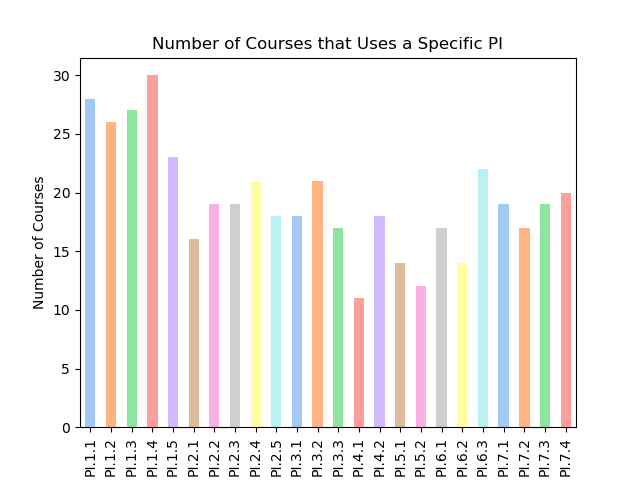

In [6]:
course_pi_usage()

### 4. Number of Contributions of Level 1-2-3 per PI

In [7]:
interactive(contrib_dist_perpi, pi=subpi_widget)

interactive(children=(Dropdown(description='Sub-PI Selection:', options=('PI.1.1', 'PI.1.2', 'PI.1.3', 'PI.1.4…

### 5. Average of Contributions of Courses per PI

pis,PI.1.1,PI.1.2,PI.1.3,PI.1.4,PI.1.5,PI.2.1,PI.2.2,PI.2.3,PI.2.4,PI.2.5,PI.3.1,PI.3.2,PI.3.3,PI.4.1,PI.4.2,PI.5.1,PI.5.2,PI.6.1,PI.6.2,PI.6.3,PI.7.1,PI.7.2,PI.7.3,PI.7.4
Average Contribution,1.945946,1.864865,1.891892,2.135135,1.513514,0.756757,1.108108,1.27027,1.324324,1.189189,1.054054,1.243243,1.027027,0.621622,0.810811,0.891892,0.837838,0.972973,0.702703,1.324324,1.108108,1.108108,1.243243,1.27027


<IPython.core.display.Javascript object>


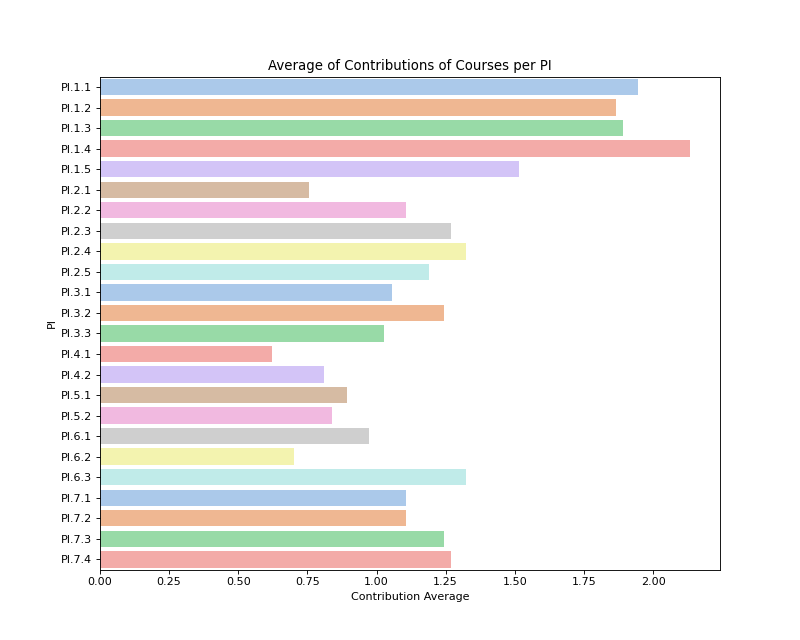

In [8]:
average_pi_contribution()

### PI Distribution Chart of Course - Pie Chart

In [9]:
interactive(pi_dist_pie, course=course_widget)

interactive(children=(Dropdown(description='Course:', options=('BLG 112E', 'BLG 202E', 'BLG 252E', 'BLG 311E',…

### PI Levels of Course

In [10]:
interactive(pi_levels_percourse, course=course_widget)

interactive(children=(Dropdown(description='Course:', options=('BLG 112E', 'BLG 202E', 'BLG 252E', 'BLG 311E',…

### Sum of PI Contributions of Courses

In [11]:
interactive(total_course_pi, choice=dist_widget)

interactive(children=(SelectMultiple(description='Courses:', index=(0,), options=('All', 'Mandatory', 'Electiv…

### PI Contribution Level Distribution of Courses

In [16]:
interactive(pi_contr_level_dist, choice=dist_widget)

interactive(children=(SelectMultiple(description='Courses:', index=(1,), options=('All', 'Mandatory', 'Electiv…